# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets and  Data understanding 

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# - Loading Data  

In [2]:
import pandas as pd
import numpy as np
import math
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Investigate and preprocessing Data

### -   Investigate and Preprocessing Portfolio Data

In [3]:
portfolio.shape

(10, 6)

In [4]:
portfolio.head(10)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [5]:
portfolio.groupby('offer_type').count()

,channels,difficulty,duration,id,reward
offer_type,,,,,
bogo,4,4,4,4,4
discount,4,4,4,4,4
informational,2,2,2,2,2


In [6]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [7]:
portfolio=portfolio.join(portfolio['channels'].str.join('|').str.get_dummies().add_prefix('channel_'))


In [8]:
portfolio

,channels,difficulty,duration,id,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


In [9]:
portfolio.drop('channels', axis = 1, inplace=True) 


In [10]:
portfolio

,difficulty,duration,id,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


### -   Investigate and Preprocessing  transcript Data 

In [11]:
transcript.shape

(306534, 4)

In [12]:
transcript.head(20)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [13]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In [14]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [15]:
transcript.notnull().count()

event     306534
person    306534
time      306534
value     306534
dtype: int64

### -   Investigate and Preprocessing  Profile Data 

In [16]:
profile.shape

(17000, 5)

In [17]:
profile.head(30)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


In [18]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [19]:
profile.notnull().sum()

age                 17000
became_member_on    17000
gender              14825
id                  17000
income              14825
dtype: int64

In [20]:
profile['member_year'] = profile.became_member_on.apply(lambda x: int(str(x)[:4]))
profile['member_month'] = profile.became_member_on.apply(lambda x: int(str(x)[4:6]))
profile['member_date'] = profile.became_member_on.apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))

In [21]:
profile

,age,became_member_on,gender,id,income,member_year,member_month,member_date
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017,2,2017-02-12
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,2017-07-15
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018,7,2018-07-12
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,2017-05-09
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,2017,8,2017-08-04
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,2018-04-26
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,2017,9,2017-09-25
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN,2017,10,2017-10-02
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,2018-02-09
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN,2016,11,2016-11-22


In [22]:
profile.drop('became_member_on', axis = 1, inplace=True) 

In [23]:
profile

,age,gender,id,income,member_year,member_month,member_date
0,118,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017,2,2017-02-12
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,2017-07-15
2,118,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018,7,2018-07-12
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,2017-05-09
4,118,None,a03223e636434f42ac4c3df47e8bac43,NaN,2017,8,2017-08-04
5,68,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,2018-04-26
6,118,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,2017,9,2017-09-25
7,118,None,68617ca6246f4fbc85e91a2a49552598,NaN,2017,10,2017-10-02
8,65,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,2018-02-09
9,118,None,8974fc5686fe429db53ddde067b88302,NaN,2016,11,2016-11-22


In [24]:
profile.describe()

,age,income,member_year,member_month
count,17000.000000,14825.000000,17000.000000,17000.000000
mean,62.531412,65404.991568,2016.635000,6.683529
std,26.738580,21598.299410,1.177624,3.487098
min,18.000000,30000.000000,2013.000000,1.000000
25%,45.000000,49000.000000,2016.000000,4.000000
50%,58.000000,64000.000000,2017.000000,7.000000
75%,73.000000,80000.000000,2017.000000,10.000000
max,118.000000,120000.000000,2018.000000,12.000000


In [25]:
## try to fix the null values for the incom  columns .
profile["income"].fillna(65404.9 , inplace= True )

In [26]:
profile

,age,gender,id,income,member_year,member_month,member_date
0,118,None,68be06ca386d4c31939f3a4f0e3dd783,65404.9,2017,2,2017-02-12
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,2017-07-15
2,118,None,38fe809add3b4fcf9315a9694bb96ff5,65404.9,2018,7,2018-07-12
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,2017-05-09
4,118,None,a03223e636434f42ac4c3df47e8bac43,65404.9,2017,8,2017-08-04
5,68,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,2018-04-26
6,118,None,8ec6ce2a7e7949b1bf142def7d0e0586,65404.9,2017,9,2017-09-25
7,118,None,68617ca6246f4fbc85e91a2a49552598,65404.9,2017,10,2017-10-02
8,65,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,2018-02-09
9,118,None,8974fc5686fe429db53ddde067b88302,65404.9,2016,11,2016-11-22


In [27]:
# try to fix the uknown gender . 
profile["gender"].fillna("U" , inplace =True )

In [28]:
profile

,age,gender,id,income,member_year,member_month,member_date
0,118,U,68be06ca386d4c31939f3a4f0e3dd783,65404.9,2017,2,2017-02-12
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,2017-07-15
2,118,U,38fe809add3b4fcf9315a9694bb96ff5,65404.9,2018,7,2018-07-12
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,2017-05-09
4,118,U,a03223e636434f42ac4c3df47e8bac43,65404.9,2017,8,2017-08-04
5,68,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,2018-04-26
6,118,U,8ec6ce2a7e7949b1bf142def7d0e0586,65404.9,2017,9,2017-09-25
7,118,U,68617ca6246f4fbc85e91a2a49552598,65404.9,2017,10,2017-10-02
8,65,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,2018-02-09
9,118,U,8974fc5686fe429db53ddde067b88302,65404.9,2016,11,2016-11-22


In [29]:
gender_counts = profile['gender'].value_counts()


In [30]:
gender_counts

M    8484
F    6129
U    2175
O     212
Name: gender, dtype: int64

In [31]:
age_count1 = profile['age'].value_counts()

In [32]:
age_count1

118    2175
58      408
53      372
51      363
54      359
59      359
57      353
52      351
55      350
56      342
63      338
60      333
49      321
62      318
67      317
64      311
61      309
48      288
50      284
66      284
65      280
68      259
70      252
69      242
47      232
45      231
71      230
42      227
43      215
46      212
       ... 
22      131
30      131
29      129
23      126
81      118
35      118
79      117
80      116
31      113
82      105
83      102
84       83
18       70
85       70
87       66
88       64
86       54
89       53
90       52
91       47
92       40
94       33
93       29
95       22
97       13
100      12
96        8
98        5
99        5
101       5
Name: age, Length: 85, dtype: int64

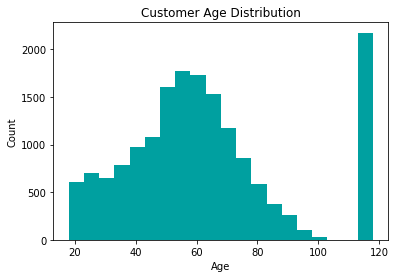

In [33]:
import matplotlib.pyplot as plt
plt.hist(profile.age, bins = 20, color = '#00A0A0');
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Customer Age Distribution');

### it is clear the missing valuse when we have the missing value the age will be 118 years so this it is impossible and I tried fix the null values in income column I fill it with mean value for income . and the gender I tried to be cleare it is nknown value . 
### till this step I tried to fix  null values in the dataset but in this step about the age I can't  fix it cause , it will affect the results .  so I drop the missing vlues , 

In [34]:
profile_remove = profile[profile.age == 118]
profile = profile[profile.age < 118].reset_index(drop=True)

In [35]:
profile

,age,gender,id,income,member_year,member_month,member_date
0,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,2017-07-15
1,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,2017-05-09
2,68,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,2018-04-26
3,65,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,2018-02-09
4,58,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,2017-11-11
5,61,F,aa4862eba776480b8bb9c68455b8c2e1,57000.0,2017,9,2017-09-11
6,26,M,e12aeaf2d47d42479ea1c4ac3d8286c6,46000.0,2014,2,2014-02-13
7,62,F,31dda685af34476cad5bc968bdb01c53,71000.0,2016,2,2016-02-11
8,49,M,62cf5e10845442329191fc246e7bcea3,52000.0,2014,11,2014-11-13
9,57,M,6445de3b47274c759400cd68131d91b4,42000.0,2017,12,2017-12-31


In [36]:
profile.shape

(14825, 7)

# - Data Analysis 

#### First  there is more than Quesition depending on the characteristics of the custmomer we  chose the perfect offer foe them , 
##### the Quesithons are :
-  How many transcript fro each type of transcript ? 
- How many Femals and male ?  
- How  the income and the average according the gender ? 
- The age and try to cluster the age to know  more about costomer ? 
- timeline for the users and  time to be the users  in Starbucks App ? 


##### after than we will detect the best offer for them 

##   Data  analysis

### -  Profile 

#### - How many Femals and male  ? 

#####   - The user male more than female  in the starbucks app  

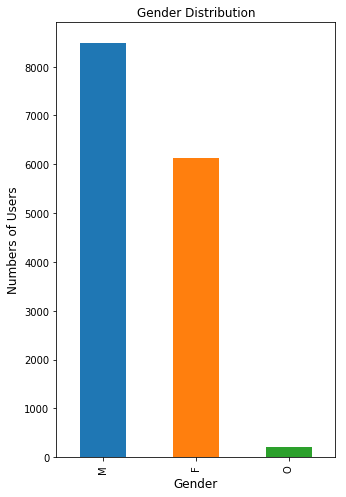

In [37]:
profile.gender.value_counts().plot('bar', figsize = (5,8))
plt.title('Gender Distribution')
plt.ylabel('Numbers of Users', fontsize = 12)
plt.xlabel('Gender', fontsize = 12);

#### - How  the income and the average according the gender ? 
  #####  it clear the female is rich than male  :) , the average  the income is 65 000 ,,,  

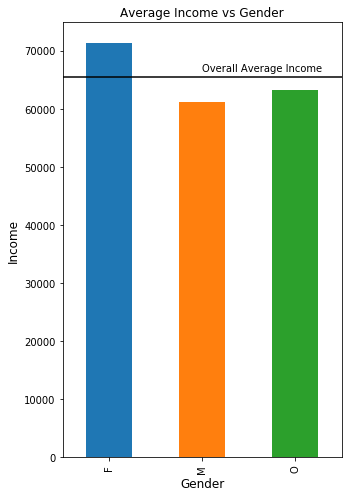

In [38]:
gender_income = profile.groupby('gender', as_index=False).agg({'income':'mean'})
mean_val = profile.income.mean()
gender_income.plot(kind = 'bar', x = 'gender', y = 'income', legend=False, figsize=(5,8))
plt.hlines(mean_val, -100 , 1000)
plt.ylabel('Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.title('Average Income vs Gender')
plt.text(1, mean_val + 1000, 'Overall Average Income');

### here the below of the shows  us  the number of the customer have  average number of the income , 
   ##### shows us the distributions of the income  for the customer . 

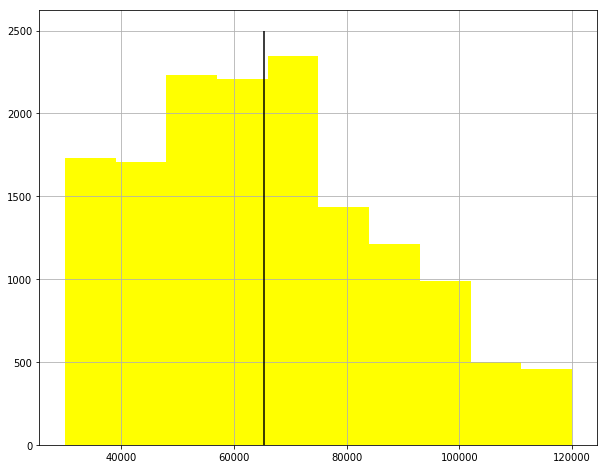

In [39]:
profile.income.hist(bins=10, figsize=(10,8), color='yellow');
plt.vlines(profile.income.mean(), 0, 2500);

#### The Age and Distributions .

In [40]:
profile['age_groups'] = pd.cut(profile.age, bins=[0, 12, 18, 21, 64, 200], labels=['child', 'teen', 'young adult', 'adult', 'elderly'])

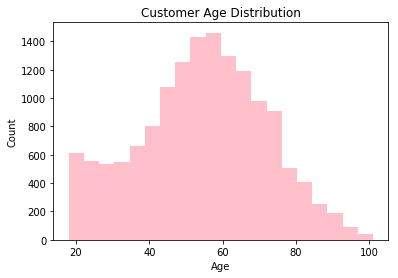

In [41]:
plt.hist(profile.age, bins = 20, color = 'pink');
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Customer Age Distribution');

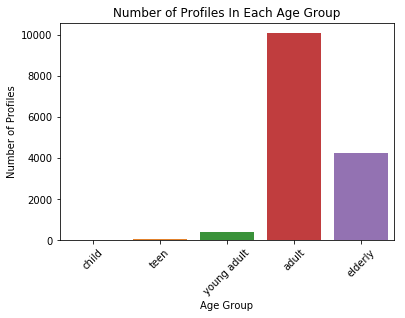

In [42]:

sns.countplot(x='age_groups', data=profile)
plt.title('Number of Profiles In Each Age Group')
plt.ylabel('Number of Profiles')
plt.xlabel('Age Group')
plt.xticks(rotation = 45)
plt.show();

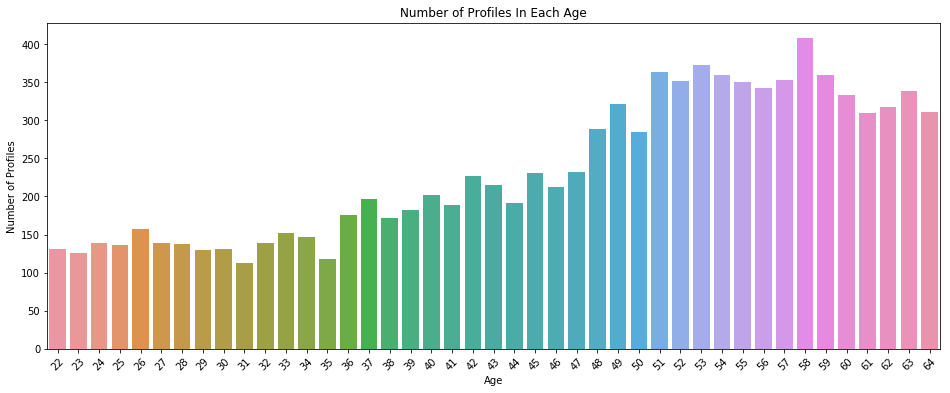

In [43]:
adults = profile[profile['age_groups'] == 'adult']

plt.figure(figsize=(16, 6))
sns.countplot(adults['age'])
plt.title('Number of Profiles In Each Age')
plt.ylabel('Number of Profiles')
plt.xlabel('Age')
plt.xticks(rotation = 45)
plt.show();

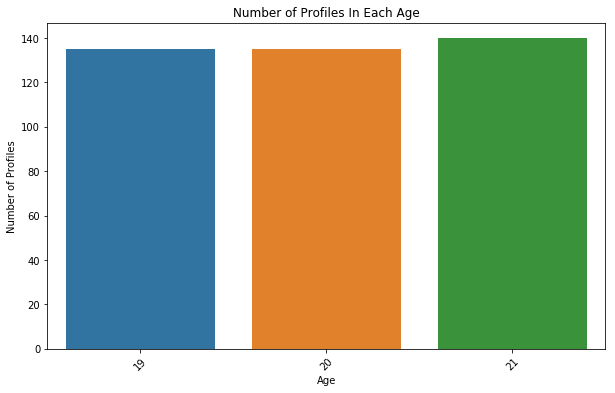

In [44]:
adults = profile[profile['age_groups'] == 'young adult']

plt.figure(figsize=(10, 6))
sns.countplot(adults['age'])
plt.title('Number of Profiles In Each Age')
plt.ylabel('Number of Profiles')
plt.xlabel('Age')
plt.xticks(rotation = 45)
plt.show();

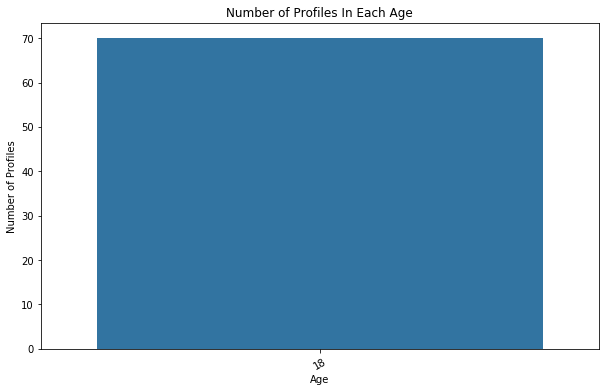

In [45]:
adults = profile[profile['age_groups'] == 'teen']

plt.figure(figsize=(10, 6))
sns.countplot(adults['age'])
plt.title('Number of Profiles In Each Age')
plt.ylabel('Number of Profiles')
plt.xlabel('Age')
plt.xticks(rotation = 30)
plt.show();

### the avrage of the age and the gender 

Text(0.5,1,'Average Income vs Gender')

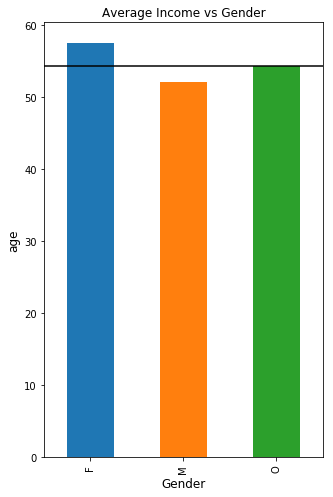

In [46]:
gender_age = profile.groupby('gender', as_index=False).agg({'age':'mean'})
mean_val = profile.age.mean()
gender_age.plot(kind = 'bar', x = 'gender', y = 'age', legend=False, figsize=(5,8))
plt.hlines(mean_val, -100 , 1000)
plt.ylabel('age', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.title('Average Income vs Gender')

### the timeline of the memeber user join the system 

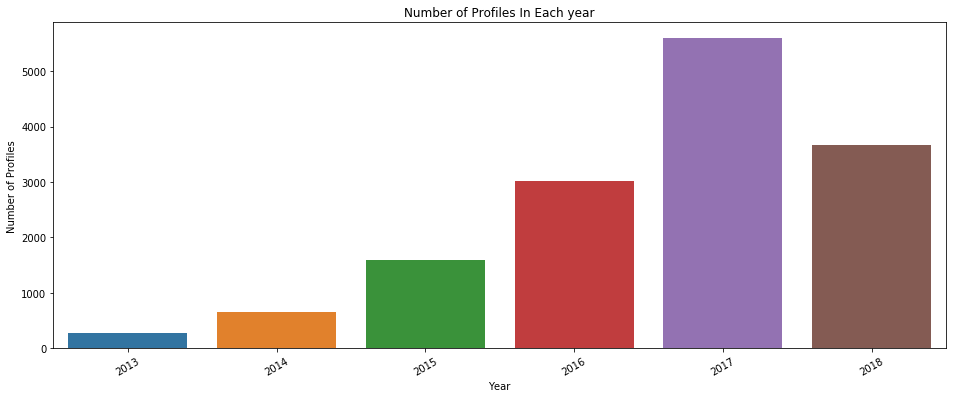

In [47]:


plt.figure(figsize=(16, 6))
sns.countplot(profile['member_year'])
plt.title('Number of Profiles In Each year')
plt.ylabel('Number of Profiles')
plt.xlabel('Year')
plt.xticks(rotation = 30)
plt.show();

In [48]:
n=profile.member_date.max()
n

Timestamp('2018-07-26 00:00:00')

In [49]:
month2017=profile.groupby('member_year', as_index=False)
month2017

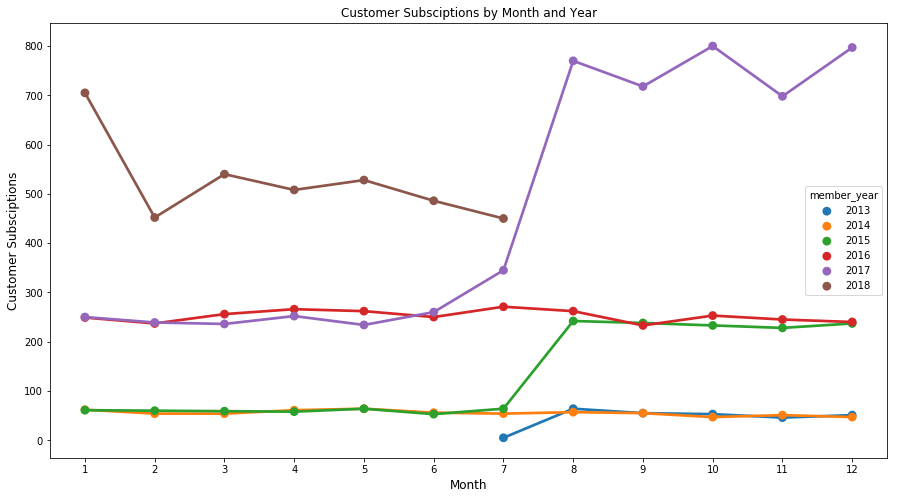

In [50]:
membership_subs = profile[profile['member_year'] >= 2013].groupby(['member_year','member_month'], as_index=False).agg({'id':'count'})
plt.figure(figsize=(15,8))
sns.pointplot(x="member_month", y="id", hue="member_year", data = membership_subs)
plt.ylabel('Customer Subsciptions', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.title('Customer Subsciptions by Month and Year');

## transcript Data

In [51]:
transcript

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


###  How many transcript fro each type of transcript ? 

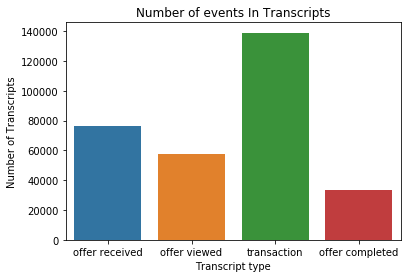

In [52]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.countplot(transcript['event'])
plt.title('Number of events In Transcripts')
plt.ylabel('Number of Transcripts')
plt.xlabel('Transcript type')
plt.xticks(rotation = 0)
plt.show();

In [53]:

completed_off_count = transcript[transcript['event'] == 'offer completed']
loyal_customer_count = transcript[(transcript['event'] == 'offer completed') | (transcript['event'] == 'transaction')].groupby(['person', 'event']).sum().reset_index()
loyal_customer_count = loyal_customer_count.sort_values( 'event' , ascending=False).head(100)
count = 1

print(' ')
print(' *************** [ LEADERBOARD ] **************')
print(' ')
for idx, row in loyal_customer_count.iterrows():
    print(f'.------------------- [ #{count} ] ------------------.')
    print(f'| Profile ID: {row["person"]} |')
    print(f'| Number of Completed Offers:       {completed_off_count[(completed_off_count["person"] == row["person"]) & (completed_off_count["event"] == "offer completed")].shape[0]}          |')
    print(f"'----------------------------------------------'")
    count += 1

 
 *************** [ LEADERBOARD ] **************
 
.------------------- [ #1 ] ------------------.
| Profile ID: 7fc0bf97fd3e4153b7a4022d7266e9f7 |
| Number of Completed Offers:       1          |
'----------------------------------------------'
.------------------- [ #2 ] ------------------.
| Profile ID: 923afabe892840a4a909b00a3114a290 |
| Number of Completed Offers:       0          |
'----------------------------------------------'
.------------------- [ #3 ] ------------------.
| Profile ID: 923387ca2d04480fba075dec7fb7c535 |
| Number of Completed Offers:       3          |
'----------------------------------------------'
.------------------- [ #4 ] ------------------.
| Profile ID: 9232bc9e68744227bdcc537e44d159f7 |
| Number of Completed Offers:       3          |
'----------------------------------------------'
.------------------- [ #5 ] ------------------.
| Profile ID: 923221df63774ab78306eaae67a86082 |
| Number of Completed Offers:       1          |
'---------------------

## Portfolio Data 

In [54]:
portfolio

,difficulty,duration,id,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


In [55]:
portfolio.channel_email.sum()

10

In [56]:
portfolio.groupby('offer_type').count()

,difficulty,duration,id,reward,channel_email,channel_mobile,channel_social,channel_web
offer_type,,,,,,,,
bogo,4,4,4,4,4,4,4,4
discount,4,4,4,4,4,4,4,4
informational,2,2,2,2,2,2,2,2


# The Results :

   

### - How many transcript fro each type of transcript ? 
  ##### In This it is clear there is offers send to custmers  but the received the around 80000 and the offer viewed 60000 and the offers completed       40000  offers   . 
  
### - How many Femals and male   ? 
   #### the male   is more than femal , the most of the male have  ajob and try to drink thier coffee on the morning . 
  
### - How  the income and the average according the gender ? 
   #### the  most of the femal have income above of the average of income , the average of incom is 65000  . 
   
   
### - The age and try to cluster the age to know  more about costumer ? 
   ####  the most of the users is adult from 22 to 65 years , is that the most of the custmer 

### - Timeline for the users and  time to be the users  in Starbucks App ?
   ####  the most of the years have the new users  from 7 of the 2017  to 6  2018  ,
   
    

#  - Conclusion 

### finally m according the resutls of the analysis , the best way to send the promotions is through the mobile there is alot  of  the users join the mobile app , and according the cutomers  data the good promotions is BoGO is the best promotion for the customer . 
